<a href="https://colab.research.google.com/github/JonathanJuradoS/Planificacion_Heuristica/blob/main/Caso5_Navegacion_Almacen_Astar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🤖 Caso 5: Navegación Autónoma en Almacén Inteligente

## 📄 Descripción
Un robot logístico debe recorrer un **almacén representado como una cuadrícula**, recolectando productos desde diferentes estantes.  
El mapa es **dinámico**, ya que algunas rutas pueden estar bloqueadas por estanterías móviles.

## 🎯 Objetivo
Determinar la **mejor ruta para visitar múltiples puntos de recogida** minimizando el tiempo total de recorrido y evitando zonas bloqueadas.

## 📌 Actividades del Estudiante
- Simular el almacén como un **grafo dinámico**.
- Aplicar el algoritmo **A\*** y/o **Enforced Hill Climbing**.
- Diseñar y comparar **heurísticas de distancia acumulada**.
- Evaluar la velocidad y calidad de los caminos encontrados.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import heapq
import random
import matplotlib.patches as patches

GRID_SIZE = 10
NUM_RECOGIDAS = 3

np.random.seed(42)
random.seed(42)

# Generar mapa con obstáculos móviles
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
obstaculos = random.sample([(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)
                            if (i, j) != (0, 0)], 15)
for (i, j) in obstaculos:
    grid[i][j] = 1

inicio = (0, 0)
recogidas = random.sample([(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)
                           if grid[i][j] == 0 and (i, j) != inicio], NUM_RECOGIDAS)



## ⭐ Algoritmo A* (A estrella)

Usa la función:
\[
f(n) = g(n) + h(n)
\]
Donde:
- \( g(n) \): costo desde el inicio
- \( h(n) \): suma de distancias Manhattan a puntos de recogida restantes


In [2]:

def heuristic_multipunto(nodo, metas):
    return sum(abs(nodo[0]-m[0]) + abs(nodo[1]-m[1]) for m in metas)

def astar_multipunto(grid, inicio, metas):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic_multipunto(inicio, metas), 0, inicio, [], metas.copy()))
    visited = set()

    while open_set:
        f, cost, current, path, remaining = heapq.heappop(open_set)
        if (current, tuple(remaining)) in visited:
            continue
        visited.add((current, tuple(remaining)))
        path = path + [current]

        if current in remaining:
            remaining.remove(current)

        if not remaining:
            return path

        for dx, dy in [(0,1), (1,0), (-1,0), (0,-1)]:
            neighbor = (current[0]+dx, current[1]+dy)
            if (0 <= neighbor[0] < GRID_SIZE and 0 <= neighbor[1] < GRID_SIZE and
                grid[neighbor[0]][neighbor[1]] == 0):
                heapq.heappush(open_set, (cost + 1 + heuristic_multipunto(neighbor, remaining),
                                          cost + 1, neighbor, path, remaining.copy()))
    return []
path_astar = astar_multipunto(grid, inicio, recogidas)


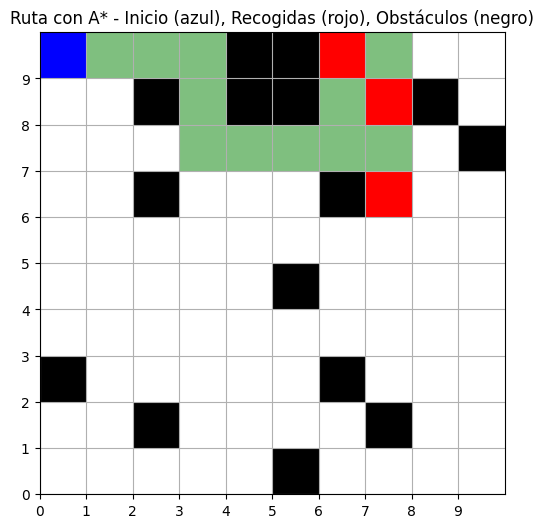

In [3]:

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, GRID_SIZE)
ax.set_ylim(0, GRID_SIZE)
ax.set_xticks(range(GRID_SIZE))
ax.set_yticks(range(GRID_SIZE))
ax.grid(True)

# Obstáculos
for (i, j) in obstaculos:
    ax.add_patch(patches.Rectangle((j, GRID_SIZE-1-i), 1, 1, facecolor="black"))
# Ruta
for (i, j) in path_astar:
    ax.add_patch(patches.Rectangle((j, GRID_SIZE-1-i), 1, 1, facecolor="green", alpha=0.5))
# Inicio
ax.add_patch(patches.Rectangle((inicio[1], GRID_SIZE-1-inicio[0]), 1, 1, facecolor="blue"))
# Metas
for (i, j) in recogidas:
    ax.add_patch(patches.Rectangle((j, GRID_SIZE-1-i), 1, 1, facecolor="red"))

ax.set_title("Ruta con A* - Inicio (azul), Recogidas (rojo), Obstáculos (negro)")
plt.show()



## ✅ Conclusiones del Caso

- El algoritmo **A\*** fue eficaz en encontrar una ruta completa desde el origen a múltiples puntos de recogida, incluso en un mapa con obstáculos dinámicos.
- La heurística utilizada (suma de distancias Manhattan) permitió priorizar los caminos más prometedores hacia los puntos no visitados.
- En entornos con rutas bloqueadas, A* sigue siendo una opción sólida para navegación logística, siempre que se diseñe una heurística realista.
- Este ejercicio muestra cómo aplicar IA para resolver **problemas reales de logística y automatización en almacenes** inteligentes.

📌 Siguiente reto: integrar condiciones dinámicas de tiempo real para cambiar obstáculos durante el recorrido.
